# Understanding the Housing Market: An exploration of Ames, Iowa


## Data Import

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [2]:
# read in train and test data
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
# check the shape of df_train
df_train.shape

(2051, 81)

In [4]:
# check the shape of df_test
df_test.shape

(878, 80)

In [5]:
# Identify which column is in train.csv but not test.csv
for col in df_train.columns:
    if col in df_test.columns:
        pass
    else:
        print(col)

SalePrice


In [6]:
# Check top five rows
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# Exploratory Data Analysis

## Missing values

In [8]:
# Set the index for our dataframe according to the ID column
df_train.set_index('Id', inplace=True)

In [9]:
# Check the id is set as index
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [10]:
# get a list of the columns that contain null values
df_train.columns[df_train.isnull().any()].tolist()

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [11]:
# How many missing values are in each column?
nan_columns = df_train[['Lot Frontage','Alley','Mas Vnr Type','Mas Vnr Area','Bsmt Qual',
 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2',
 'Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Fireplace Qu','Garage Type',
 'Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond','Pool QC',
 'Fence','Misc Feature']]

# calculate total
nan_columns.isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [12]:
# What percent of each column are missing?
nan_columns.isnull().sum() * 100 / len(df_train)

Lot Frontage      16.089712
Alley             93.174061
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Qual          2.681619
Bsmt Cond          2.681619
Bsmt Exposure      2.827889
BsmtFin Type 1     2.681619
BsmtFin SF 1       0.048757
BsmtFin Type 2     2.730375
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Total Bsmt SF      0.048757
Bsmt Full Bath     0.097513
Bsmt Half Bath     0.097513
Fireplace Qu      48.756704
Garage Type        5.509508
Garage Yr Blt      5.558264
Garage Finish      5.558264
Garage Cars        0.048757
Garage Area        0.048757
Garage Qual        5.558264
Garage Cond        5.558264
Pool QC           99.561190
Fence             80.497318
Misc Feature      96.830814
dtype: float64

In [13]:
# Since there are many NaN values for 'Misc Feature', check if the neighboring column 'Misc Val' is 0. 
# This column is also lacking about 96% of the data
df_train['Misc Val'].value_counts(normalize=True)

0        0.968308
400      0.005851
500      0.003901
600      0.002925
2000     0.002438
450      0.002438
700      0.001950
2500     0.000975
4500     0.000975
3000     0.000975
1200     0.000975
80       0.000488
8300     0.000488
12500    0.000488
460      0.000488
300      0.000488
54       0.000488
3500     0.000488
480      0.000488
650      0.000488
800      0.000488
900      0.000488
1150     0.000488
1300     0.000488
1500     0.000488
6500     0.000488
455      0.000488
17000    0.000488
Name: Misc Val, dtype: float64

In [14]:
# Why are there are so many NaN values in this column?
df_train['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [15]:
# Does this affect the Pool Area column?
df_train['Pool Area'].value_counts(normalize=True)

0      0.995612
561    0.000488
519    0.000488
800    0.000488
738    0.000488
648    0.000488
576    0.000488
480    0.000488
368    0.000488
228    0.000488
Name: Pool Area, dtype: float64

In [16]:
# No alley is being interpreted as a null value - this is the case for many columns
df_train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

**Missing Data:** The highest number of NaN values are in the columns 'Pool QC', 'Misc Feature', 'Alley' and 'Fence'. Since these columns are missing between 80-99% of the data, we should consider dropping them. The high number of null values in some of these columnns also translates to their neighboring columns. For example, 'Pool Area' and 'Misc Val' have a high percentage of 0 values.

**What do missing values mean?**  
Many of the categorical variables in this dataset contain a category "NA" which indicates there is "No Pool", "No Alley" or "None". The NA category is being interpreted as a null value, rather than the fact that the property does not have this feature.

**Imputing:** There are still a number of columns containing NaN values where we need to impute a new value in order for the model to work correctly. 

- Lot Frontage       330 impute 0, property does not have this feature
- Alley             1911 drop
- Mas Vnr Type        22 impute 'None', no masonry veneer
- Mas Vnr Area        22 impute 0, NaN values match Vnr Type column
- Bsmt Qual           55 impute 'None, property does not have this feature
- Bsmt Cond           55 impute 'None, property does not have this feature
- Bsmt Exposure       58 impute 'None, property does not have this feature
- BsmtFin Type 1      55 impute 'None, property does not have this feature
- BsmtFin SF 1         1
- BsmtFin Type 2      56 impute 'None, property does not have this feature
- BsmtFin SF 2         1
- Bsmt Unf SF          1
- Total Bsmt SF        1
- Bsmt Full Bath       2
- Bsmt Half Bath       2
- Fireplace Qu      1000 impute 'None', property does not have this feature
- Garage Type        113 impute 'None', property does not have this feature
- Garage Yr Blt      114 impute 0, property does not have this feature
- Garage Finish      114 impute 'None', property does not have this feature
- Garage Cars          1
- Garage Area          1
- Garage Qual        114 impute 'None', property does not have this feature
- Garage Cond        114 impute 'None', property does not have this feature
- Pool QC           2042 drop
- Fence             1651 drop
- Misc Feature      1986 drop

## Datatypes

In [17]:
# Check the datatypes for columns 0-20
df_train.iloc[:,0:20].dtypes

PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
Utilities        object
Lot Config       object
Land Slope       object
Neighborhood     object
Condition 1      object
Condition 2      object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
Year Built        int64
dtype: object

In [18]:
# Check the datatypes for columns 20-40
df_train.iloc[:,20:40].dtypes

Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating            object
dtype: object

In [19]:
# Check the datatypes for columns 40-60
df_train.iloc[:,40:60].dtypes

Heating QC          object
Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
Garage Yr Blt      float64
dtype: object

In [20]:
# Check the datatypes for columns 60-81
df_train.iloc[:,60:81].dtypes

Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Screen Porch        int64
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

## Identify outliers

In [21]:
# Check summary statistics
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [22]:
# After checking all variables with boxplots, the following were identified as containing outliers

outlier_variables = df_train[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built', 'Mas Vnr Area', 
                              'BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                              'Low Qual Fin SF', 'Gr Liv Area','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Bedroom AbvGr', 
                              'Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces','Garage Yr Blt', 'Garage Cars', 'Garage Area', 
                              'Wood Deck SF',  'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
                              'Pool Area', 'Misc Val', 'SalePrice']]

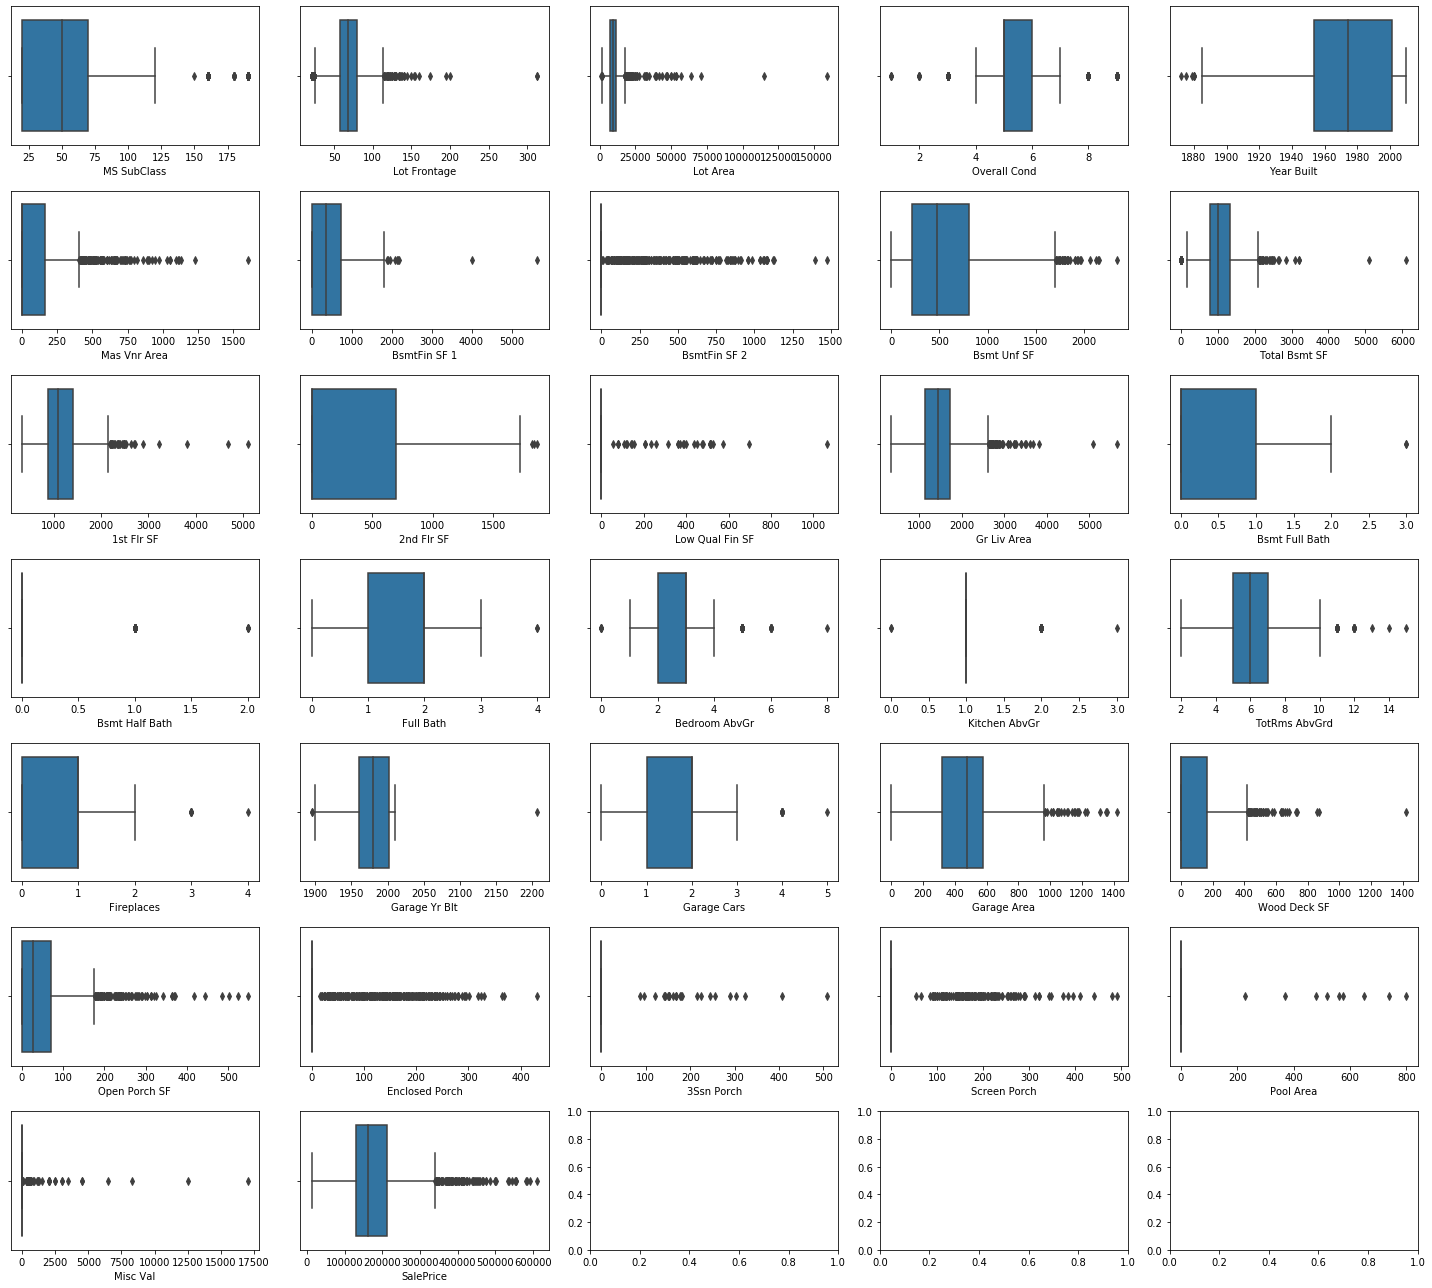

In [23]:
fig, axes = plt.subplots(7,5, figsize=(20,18))

for i, col in enumerate(outlier_variables.columns):
    sns.boxplot(outlier_variables[col], ax=axes[i//5,i%5])
    plt.tight_layout();

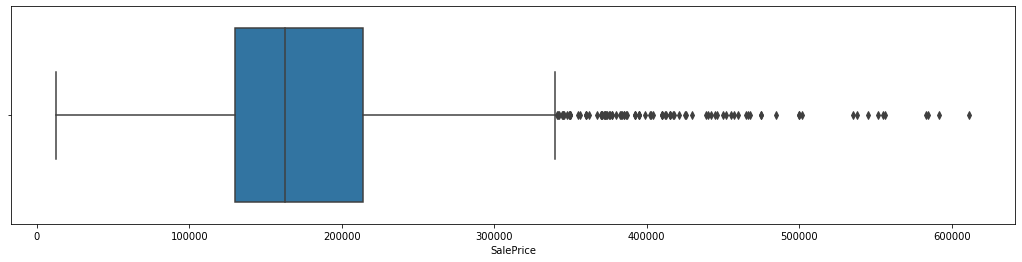

In [24]:
# Look into the distribution of sale prices
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(x = df_train['SalePrice'], ax=ax);

**Outliers:** Outliers convey information, so unless we can prove they are errors, they should not be dropped. In this dataset, the presence of outliers in several variables can be attributed to the fact that many properties don't have a certain feature, so properties that do have that feature appear as outliers. Some general conclusions:
- Overall condition of most properties falls in the 4-7 range, but there are some outliers at either end of the spectrum. 
- Only two properties have a basement half bathroom.
- The distribution of Sale Price shows outliers begining for properties around $340,000 and has a positive skew. It would be relevant to investigate further. (doesn't it have to be normal?)

The variables with notable outliers include:
- Garage Yr Blt (year 2207)
- Kitchen AbvGr (some properties have 3 kitchens above grade)
- Garage Cars (some properties have 4 and 5 car garage capacity)

In [25]:
# Consider whether ordinal categorical variables should be converted to numbers
df_train['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

# Data Cleaning


## Clean training data

- Make all column names lowercase
- Drop columns with 80% or more null (or 0) values: Pool QC, Pool Area, Misc Feature, Misc Val, Alley and Fence.
- Impute values for columns with unnecessary NaN values

In [26]:
# make column names lowercase
df_train.columns = df_train.columns.str.lower()

In [27]:
# check column names
df_train.columns

Index(['pid', 'ms subclass', 'ms zoning', 'lot frontage', 'lot area', 'street',
       'alley', 'lot shape', 'land contour', 'utilities', 'lot config',
       'land slope', 'neighborhood', 'condition 1', 'condition 2', 'bldg type',
       'house style', 'overall qual', 'overall cond', 'year built',
       'year remod/add', 'roof style', 'roof matl', 'exterior 1st',
       'exterior 2nd', 'mas vnr type', 'mas vnr area', 'exter qual',
       'exter cond', 'foundation', 'bsmt qual', 'bsmt cond', 'bsmt exposure',
       'bsmtfin type 1', 'bsmtfin sf 1', 'bsmtfin type 2', 'bsmtfin sf 2',
       'bsmt unf sf', 'total bsmt sf', 'heating', 'heating qc', 'central air',
       'electrical', '1st flr sf', '2nd flr sf', 'low qual fin sf',
       'gr liv area', 'bsmt full bath', 'bsmt half bath', 'full bath',
       'half bath', 'bedroom abvgr', 'kitchen abvgr', 'kitchen qual',
       'totrms abvgrd', 'functional', 'fireplaces', 'fireplace qu',
       'garage type', 'garage yr blt', 'garage finish'

In [28]:
# Drop 6 columns
df_train.drop(columns=['pool qc', 'pool area', 'misc feature', 'misc val', 'alley', 'fence'], inplace=True)

In [29]:
# Check the shape of the new df
df_train.shape

(2051, 74)

### Impute Null Values

In [30]:
# Create a loop that imputes 0 for float and int columns and 'none' 
# for object columns to replace null values

for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        if df_train[col].dtype =='float64' or df_train[col].dtype =='int64':
            df_train[col].fillna(0, inplace=True)
        elif df_train[col].dtype =='object':
            df_train[col].fillna('None', inplace=True)

In [31]:
# Confirm no null values exist
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 74 columns):
pid                2051 non-null int64
ms subclass        2051 non-null int64
ms zoning          2051 non-null object
lot frontage       2051 non-null float64
lot area           2051 non-null int64
street             2051 non-null object
lot shape          2051 non-null object
land contour       2051 non-null object
utilities          2051 non-null object
lot config         2051 non-null object
land slope         2051 non-null object
neighborhood       2051 non-null object
condition 1        2051 non-null object
condition 2        2051 non-null object
bldg type          2051 non-null object
house style        2051 non-null object
overall qual       2051 non-null int64
overall cond       2051 non-null int64
year built         2051 non-null int64
year remod/add     2051 non-null int64
roof style         2051 non-null object
roof matl          2051 non-null object
exterior 1st       

### Convert ordinals to integers

In [32]:
# Create a dictionary that assigns numbers to each category

condition_dict = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

ordinals = ['exter qual','exter cond','bsmt qual','bsmt cond','heating qc','kitchen qual','garage qual','garage cond']

for i in ordinals:
    df_train.replace({i:condition_dict}, inplace=True)

In [33]:
# Confirm change
df_train[ordinals].head()

,exter qual,exter cond,bsmt qual,bsmt cond,heating qc,kitchen qual,garage qual,garage cond
Id,,,,,,,,
109,4,3,3,3,5,4,3,3
544,4,3,4,3,5,4,3,3
153,3,4,3,3,3,4,3,3
318,3,3,4,3,4,3,3,3
255,3,3,2,4,3,3,3,3


### Drop Outliers

In [34]:
# Drop property with 5 car garage capacity
df_train.drop(747, inplace=True)

In [35]:
# Confirm
df_train['garage cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
Name: garage cars, dtype: int64

In [36]:
# Drop property with garage built in 2207
df_train.drop(2261, inplace=True)

In [37]:
# Confirm
df_train['garage yr blt'].max()

2010.0

### Save to csv

In [38]:
df_train.to_csv('../data/train_clean.csv')

## Clean testing data

In [39]:
# Set the index for our dataframe according to the ID column
df_test.set_index('Id', inplace=True)

In [40]:
df_test.shape

(878, 79)

In [41]:
# make column names lowercase
df_test.columns = df_test.columns.str.lower()

In [42]:
# Drop 6 columns
df_test.drop(columns=['pool qc', 'pool area', 'misc feature', 'misc val', 'alley', 'fence'], inplace=True)

In [43]:
# Check updates were implemented correctly
df_test.head()

,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,...,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,mo sold,yr sold,sale type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,Po,Y,0,60,112,0,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,170,0,0,0,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,100,24,0,0,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,TA,N,0,0,184,0,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,0,76,0,0,185,7,2009,WD


In [44]:
df_test.shape

(878, 73)

### Impute Null Values

In [45]:
# Create a loop that imputes 0 for float and int columns and 'none' 
# for object columns to replace null values

for col in df_test.columns:
    if df_test[col].isnull().sum() > 0:
        if df_test[col].dtype =='float64' or df_test[col].dtype =='int64':
            df_test[col].fillna(0, inplace=True)
        elif df_test[col].dtype =='object':
            df_test[col].fillna('None', inplace=True)

In [46]:
# Confirm no null values exist
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 73 columns):
pid                878 non-null int64
ms subclass        878 non-null int64
ms zoning          878 non-null object
lot frontage       878 non-null float64
lot area           878 non-null int64
street             878 non-null object
lot shape          878 non-null object
land contour       878 non-null object
utilities          878 non-null object
lot config         878 non-null object
land slope         878 non-null object
neighborhood       878 non-null object
condition 1        878 non-null object
condition 2        878 non-null object
bldg type          878 non-null object
house style        878 non-null object
overall qual       878 non-null int64
overall cond       878 non-null int64
year built         878 non-null int64
year remod/add     878 non-null int64
roof style         878 non-null object
roof matl          878 non-null object
exterior 1st       878 non-null object


### Convert ordinals to integers

In [47]:
# Create a dictionary that assigns numbers to each category

condition_dict = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

ordinals = ['exter qual','exter cond','bsmt qual','bsmt cond','heating qc','kitchen qual','garage qual','garage cond']

for i in ordinals:
    df_test.replace({i:condition_dict}, inplace=True)

In [48]:
# Confirm change
df_test[ordinals].head()

,exter qual,exter cond,bsmt qual,bsmt cond,heating qc,kitchen qual,garage qual,garage cond
Id,,,,,,,,
2658,3,2,2,3,4,2,1,1
2718,3,3,4,3,3,3,3,3
2414,4,3,4,4,5,4,3,3
1989,4,3,3,3,3,3,2,3
625,3,3,4,3,4,3,3,3


### Save to csv

In [49]:
df_test.to_csv('../data/test_clean.csv')

# Exploratory Visuals


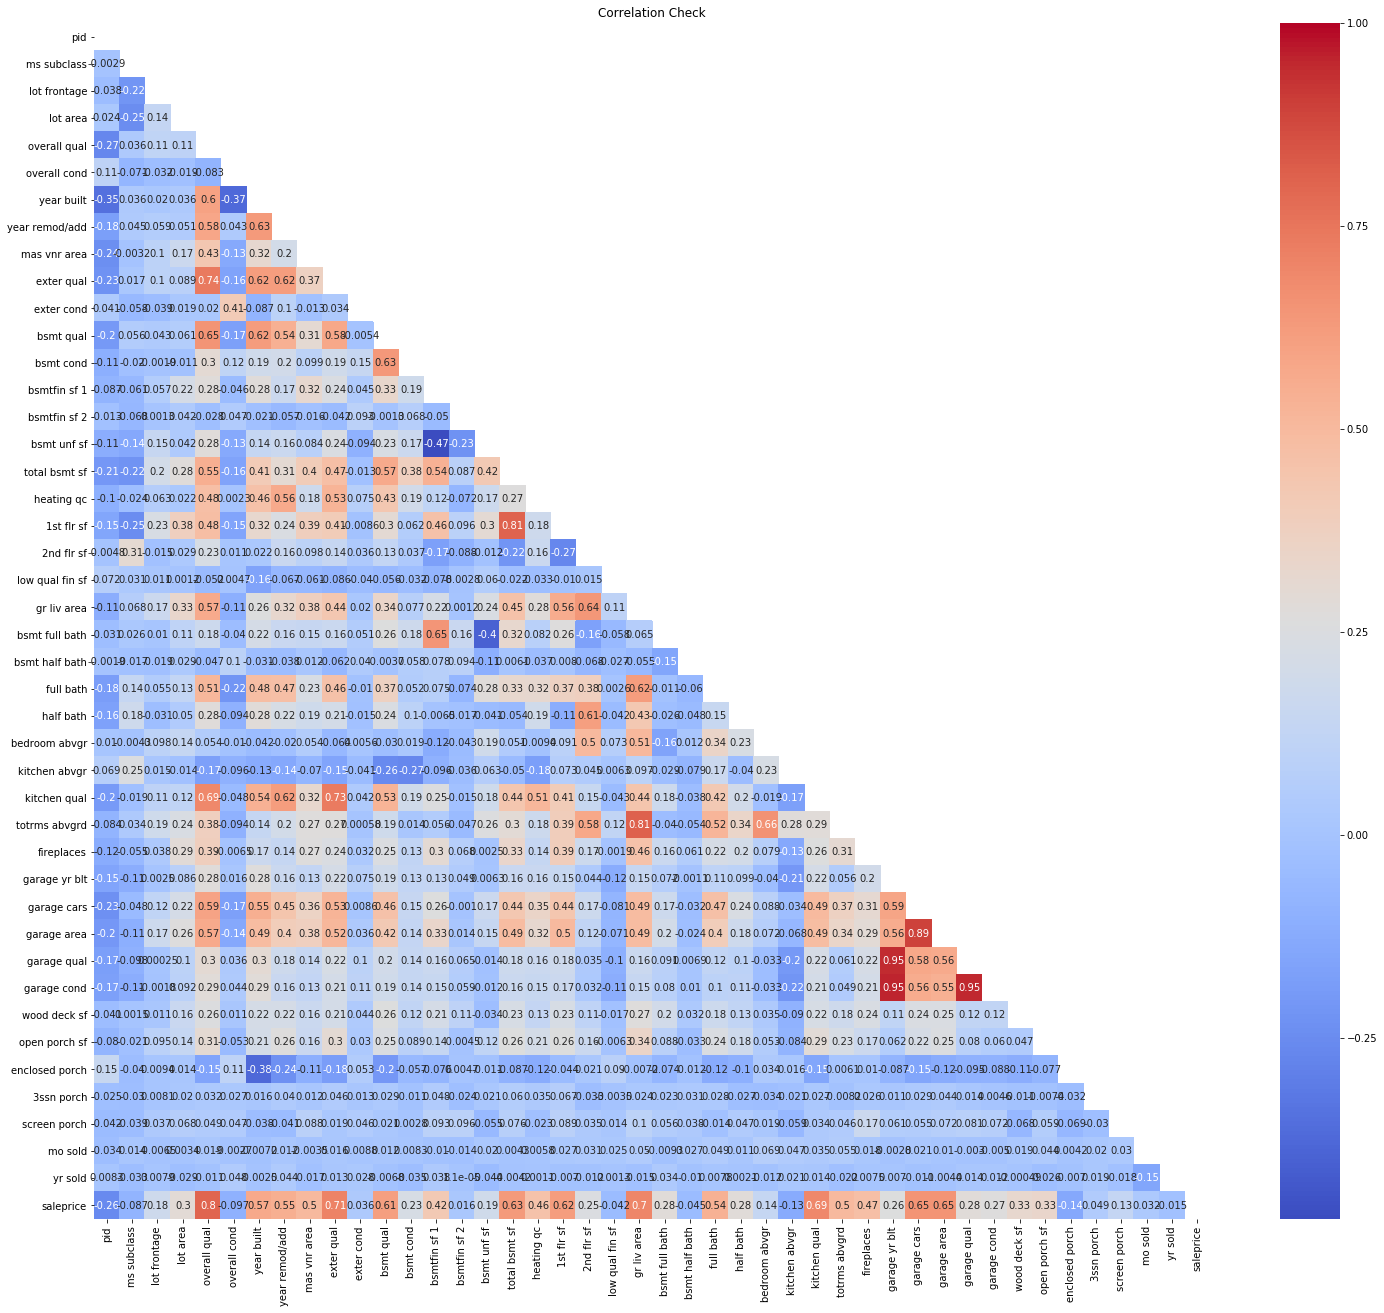

In [50]:
# Look at the correlations between variables

fig, ax = plt.subplots(figsize=(25, 22))

# Create mask to hide upper triangle
mask = np.zeros_like(df_train.corr()) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_train.corr(), annot=True, ax=ax, cmap='coolwarm', mask=mask)

# Adjust for cut off edges
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Check');

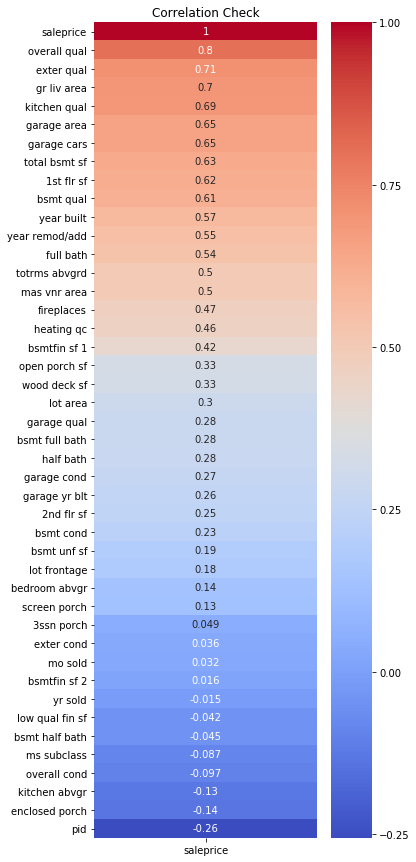

In [51]:
# Which variables have the strongest correlations with saleprice?

fig, ax = plt.subplots(figsize=(5, 15))

sns.heatmap(df_train.corr()[['saleprice']].sort_values(by=['saleprice'], 
                                                       ascending=False),annot=True, ax=ax, cmap='coolwarm')

# Adjust for cut off edges
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Check');

**Variable Correlations**: At first glance, the variables with the strongest positive correlation to sale price appear to be overall qual, exterior qual, gr living area, kitchen qual, garage area, garage cars and total basement sf. The variables with the strongest negative correlation are overall cond, kitchen abvgr and enclosed porch, which implies these factors bring down the price of a property.

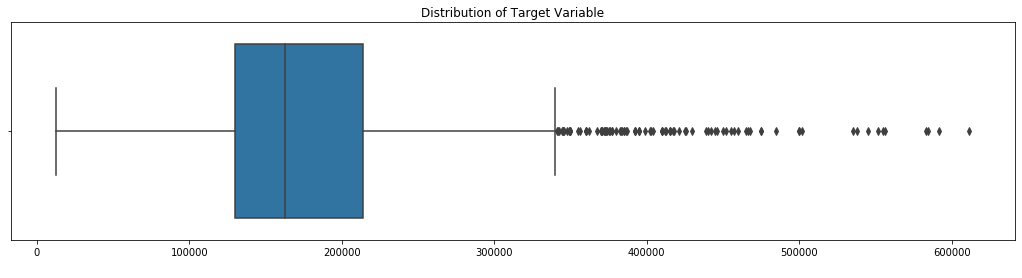

In [62]:
# Check the distribution of the target variable
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(x= df_train['saleprice'], ax=ax)
ax.set_title("Distribution of Target Variable")
ax.set_xlabel(' ')
ax.tick_params(labelsize=10);

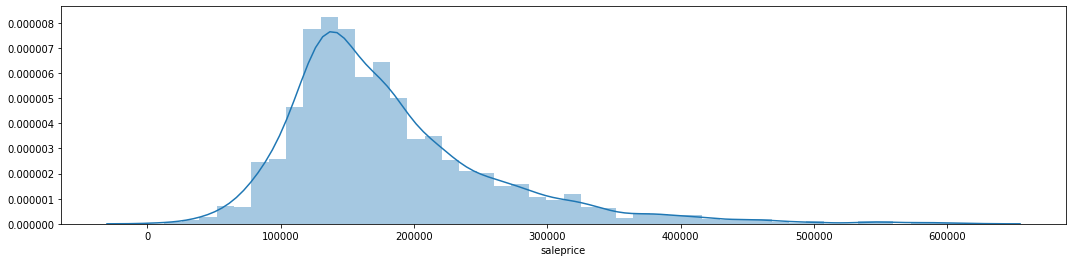

In [53]:
fig, ax = plt.subplots(figsize=(18,4))
sns.distplot(df_train['saleprice'], ax=ax);

The average sale price of a house in our dataset is around 180,000 dollars with most of the values falling within the 130,000 to 215,000 dollar range. It also appears that the distribution is positively skewed.

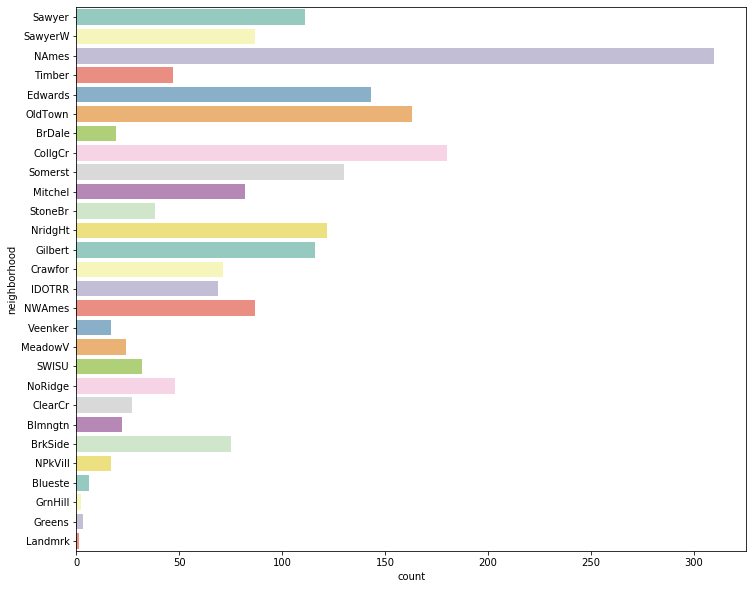

In [54]:
#Which neighborhoods have the most properties?
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(y="neighborhood", data=df_train, palette="Set3", ax=ax);

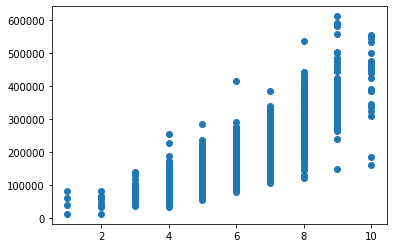

In [55]:
# Check the relationship between overall quality (scale 1-10) and sale price
plt.scatter(x=df_train['overall qual'], y=df_train['saleprice']);

In [56]:
df_train['overall qual'].value_counts()

5     562
6     506
7     431
8     249
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall qual, dtype: int64

In [57]:
# What is the median value for overall quality?
df_train['overall qual'].describe()

count    2049.000000
mean        6.111762
std         1.426145
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall qual, dtype: float64

# References

Finding Nan Values: https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe